ModuleNotFoundError: No module named 'openquake'

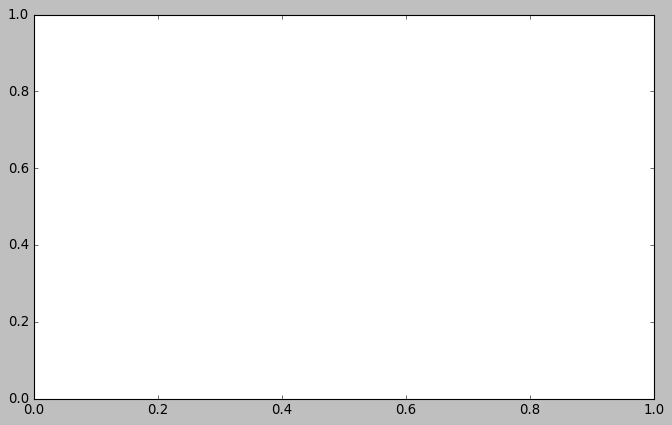

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 27 11:28:54 2015

@author: tallen
"""

# created bt Talllen, modifed by JLG

import sys
sys.path.append(r"C:\Users\Admin\OneDrive - The University of Melbourne\PhD\Github\Generic_Seismic_Hazard_Codes\treviallen_codes")



from mmi_tools import allen_etal_2012_rrup_ipe, allen_etal_2012_rhypo_ipe, \
                      atkinson_wald_ceus_ipe, atkinson_wald_cal_ipe, pgm2mmi_worden12, \
                      atkinson_worden_wald14_cal_ipe, atkinson_worden_wald14_ceus_ipe, \
                      atkinson_worden_wald14_ceus_oq, leonard15_ipe
from misc_tools import get_mpl2_colourlist
from numpy import array, arange, log10, sqrt, logspace
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('classic')

plt.rcParams['pdf.fonttype'] = 42

fig = plt.figure(figsize=(10, 6))
plt.tick_params(labelsize=12)

# event details
mag = 5.9
eqdep = 12 
eqlat = -37.5063
eqlon = 146.4022
ztor = 4.
maxrrup = 510.
rjb = logspace(0, log10(maxrrup), 60)
rrup = sqrt(rjb**2 + eqdep**2)
rhypo = rrup
repi = rjb
rake = 0. # USGS CMT
dip  = 90.
vs30 = 360.

####################################################################################
# plot models   

# do AW07 CEUS
AW07ceus, sig = atkinson_wald_ceus_ipe(mag, rrup)

# do AW07 CA
AW07cal, sig = atkinson_wald_cal_ipe(mag, rrup)

# do Allen et al 2012 Rrup
Aea12rup, Aea12sig = allen_etal_2012_rrup_ipe(mag, rrup, eqdep)

# do Allen et al 2012 Rhypo
Aea12hypo, Aea12sig = allen_etal_2012_rhypo_ipe(mag, rrup, eqdep)

# do AWW14 CEUS
SMbias = -0.233
AWW14ceus, sig = atkinson_worden_wald14_ceus_ipe(mag, rhypo, repi)
AWW14ceus_bias = AWW14ceus + SMbias # from Moe

# do AWW14 CA
AWW14cal, sig = atkinson_worden_wald14_cal_ipe(mag, rhypo)

# do Leonard 2015
L15 = leonard15_ipe(mag, rrup)

# plot models
cl = get_mpl2_colourlist()
syms = ['o', '^', 's', 'd', 'v', '<', 'h', '>', 'p']

# make secondary plots to get around color issues
h1 = plt.semilogx(rjb, Aea12rup, syms[0], color=cl[0], ls='-', ms=7, mec=cl[0], markevery=5)
h2 = plt.semilogx(rjb, AWW14ceus, syms[1], color=cl[1], ls='-', ms=7, mec=cl[1], markevery=5)
h3 = plt.semilogx(rjb, AWW14cal, syms[2], color=cl[2], ls='-', ms=7, mec=cl[2], markevery=5)
h4 = plt.semilogx(rjb, L15, syms[3], color=cl[3], ls='-', ms=7, mec=cl[3], markevery=5)

##################################################################################

leg1 = plt.legend([h1[0], h2[0], h3[0], h4[0]], 
           ['AWW12 ATR', 'AWW14 CEUS', 'AWW14 CA', 'L15 AU'], fontsize=12, loc=3, numpoints=1)

plt.grid(which='both', color='0.5')
plt.xlim([8, maxrrup])
plt.ylim([1, 8])
plt.xlabel('Epicentral Distance (km)', fontsize=14)
plt.ylabel('Macroseismic Intensity', fontsize=14)

xtic = [10, 20, 50, 100, 200]
xlab = ['10', '20', '50', '100', '200']
plt.xticks(xtic, xlab)
ylab = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII']
ytic = range(1, 9)
plt.yticks(ytic, ylab)

plt.savefig('wp_mmi_atten.png', format='png', dpi=300, bbox_inches='tight')
#plt.savefig('figures/moe_mmi_atten.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()